ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

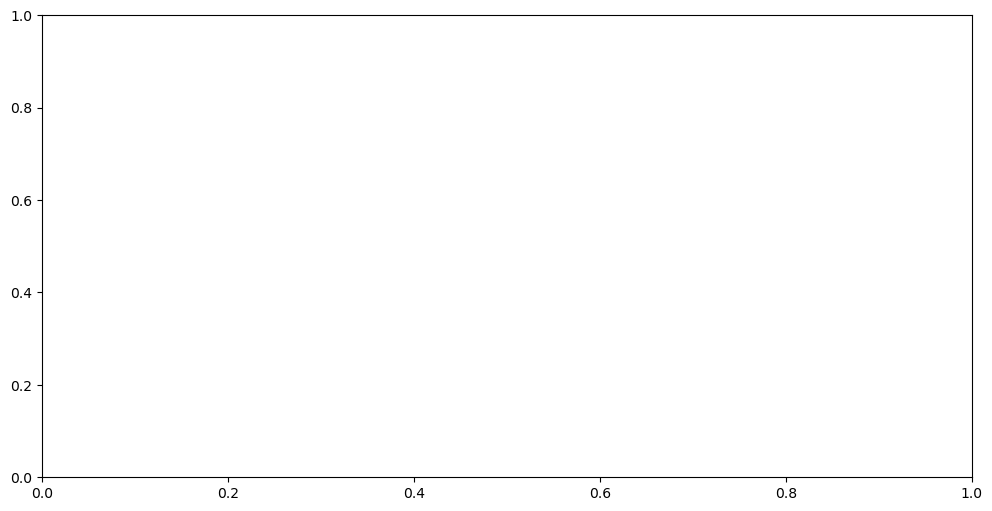

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the combined dataset
combined_df = pd.read_csv("Refined_Model_Performance_Data.csv")

# Drop the "classification_report" column as it is not useful
combined_df.drop(columns=["classification_report"], inplace=True, errors='ignore')

# Calculate the average performance across 5 folds
avg_performance = combined_df.groupby(["Label", "Model", "Data Type"]).mean().reset_index()

# Define metrics and titles
metrics = ["accuracy", "f1_score", "top_3_accuracy", "threshold_accuracy"]
titles = ["Accuracy", "F1-score", "Top-3 Accuracy", "Threshold Accuracy"]

# Plot accuracy, f1-score, top-3 accuracy, and threshold accuracy comparison across models
for metric, title in zip(metrics, titles):
    plt.figure(figsize=(12, 6))
    for model in avg_performance["Model"].unique():
        subset = avg_performance[avg_performance["Model"] == model]
        plt.plot(subset["Label"], subset[metric], marker='o', linestyle='-', label=model)
    plt.xticks(rotation=90)
    plt.xlabel("Labels")
    plt.ylabel(f"Average {title}")
    plt.title(f"Model Performance Comparison ({title})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate the average performance per dataset per model
avg_dataset_performance = avg_performance.groupby(["Model", "Data Type"]).mean().reset_index()

# Plot metric comparison across different datasets, comparing models
for metric, title in zip(metrics, titles):
    plt.figure(figsize=(10, 6))
    for model in avg_dataset_performance["Model"].unique():
        subset = avg_dataset_performance[avg_dataset_performance["Model"] == model]
        plt.plot(subset["Data Type"], subset[metric], marker='o', linestyle='-', label=model)
    plt.xlabel("Dataset Type")
    plt.ylabel(f"Average {title}")
    plt.title(f"Dataset Performance Comparison ({title})")
    plt.legend()
    plt.grid(True)
    plt.show()

